# Introduction to Machine Learning

-- Introduction --

## Question
Which 3 independent features have the most influence over the amount of the positive rate and amount of deaths when the number of tests stays the same?

## Hypotheses
All features have a certain influence. The features with the most influence however, are the ones about tests and utilities (like handwashing and hospital beds)

In [2]:
import sys

major = sys.version_info.major
minor = sys.version_info.minor

print("You are using Python {}.{}.".format(major, minor))

if major >= 3 and minor >= 8:
    print("Have a nice day!")
else:
    print("The version you're using a version that is not supported.")

You are using Python 3.8.
Have a nice day!


In [2]:
import pandas as pd
from os import getcwd

print("Below is a subset of the data we'll be using:")

data_dir = getcwd() + '/data/'
csv_data = pd.read_csv(data_dir + 'data.csv', low_memory=False)
csv_data.head()

Below is a subset of the data we'll be using:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


# 1. Which variables can we intuitively accept as independent and which ones as dependent?

The use of independent variables in Machine Learning describes variables that can be tweaked to test the effects on the dependent variables. Dependent variables are the outcomes we measure based on all independent variables. 

In the case of our dataset on the Covid-19 pandemic we can classify factors that can influence the number of cases, deaths, positive and cardiovasc death rates as independent variables. The number of total and new cases and deaths and its mutated forms (for example “total_cases_per_million”) are the dependent variables. They are the outcome of all the possible factors.

https://medium.com/machine-learner/independent-and-dependent-variables-1-10d8553ad616


In [3]:
import numpy as np

def get_variables(input_data):
    dependent = np.array([])
    independent = np.array([])

    dependent_indexes = []
    independent_indexes = []

    index = 0
    for header in input_data.columns.values:
        if "deaths" in header or "_rate" in header or "_cases" in header:
            independent = np.append(independent, [header])
            independent_indexes.append(index)
        else:
            dependent = np.append(dependent, [header])
            dependent_indexes.append(index)

        index += 1
    
    return [dependent, dependent_indexes, independent, independent_indexes]

[dependent, dependent_indexes, independent, independent_indexes] = get_variables(csv_data)

print("\033[1mAll features:\033[0m\n{}\n".format(", ".join(csv_data.columns.values)))
print("\033[1mIndependent features:\033[0m\n{}\n".format(", ".join(independent)))
print("\033[1mIndependent features:\033[0m\n{}\n".format(independent_indexes))
print("\033[1mDependent features:\033[0m\n{}\n".format(", ".join(dependent)))
print("\033[1mDependent features:\033[0m\n{}\n".format(dependent_indexes))

All features:
iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, 

# 2. What are your observations on the completeness of the dataset? Which mitigating actions do you plan to take to work around the incompleteness of the dataset?

With the given dataset in the CSV file there is a large number of cells on tests that are empty. Most of the other variables also have missing cells in the dataset. For example a large number of cells on smoking is not available for a lot of rows, as well as the handwashing facilities and the number of hospital beds. As we established in the last question, these variables are all independent features. They are critical for the use of training data. That is why we are going to fill them with calculated values.
Missing numbers are calculated based on the average or the median of that type of variable. With this approach we can still make an estimate of the cell based on the rest of the data. The missing values that should contain strings are filled with the most common value in that column. Each value that is available in the column is labeled then accounted for. The most common value of all the labels is then given to the empty cells. Add kNN when we have time left.

TODO:
- Split the data into sets for each country
- Fill in the missing values for each country

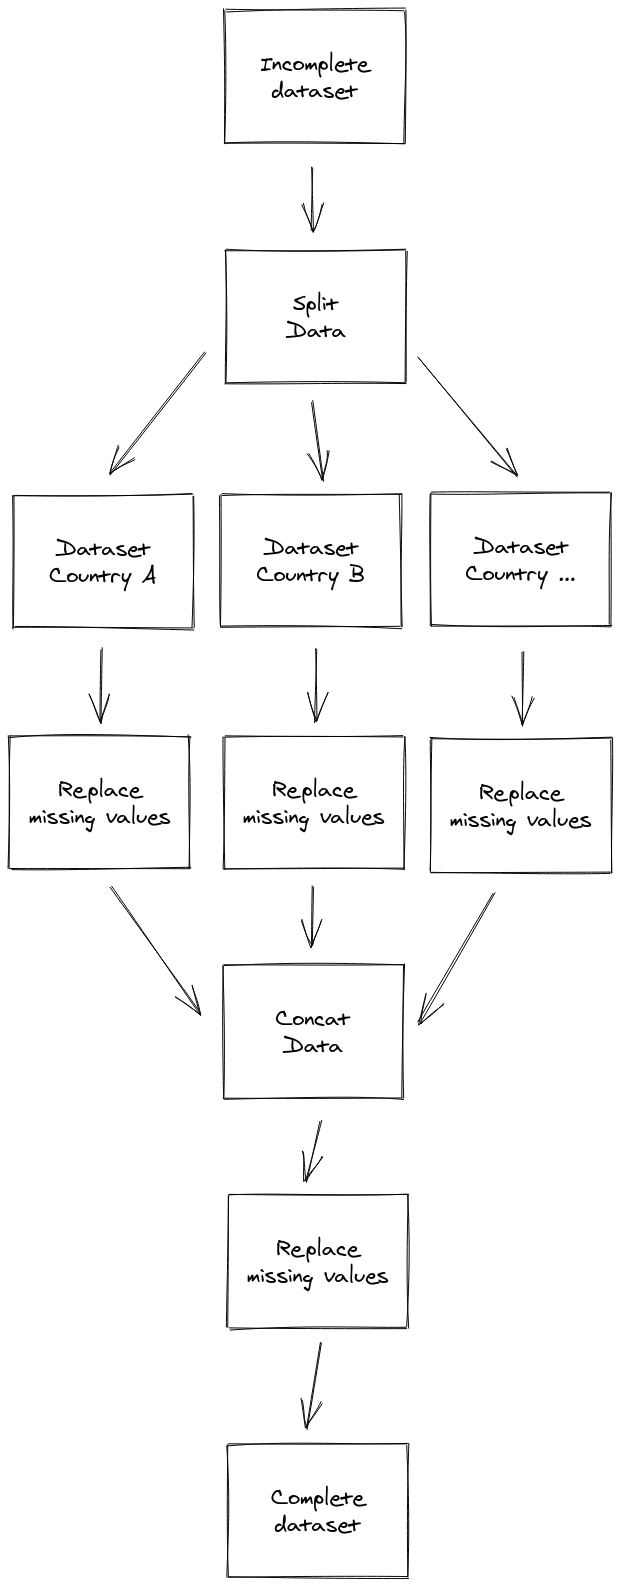


https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

In [4]:
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from pandas.api.types import is_string_dtype

# Try and replace the missing numbers with the median value of that column
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Try and replace the missing strings with the most frequent value of that column
text_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


numeric_data = csv_data.select_dtypes(include=np.number)
text_data = csv_data.select_dtypes(exclude=np.number)

numeric_data = pd.DataFrame(numeric_imputer.fit_transform(numeric_data), columns=numeric_data.columns)
text_data = pd.DataFrame(text_imputer.fit_transform(text_data), columns=text_data.columns)
data = text_data.join(numeric_data)

[dependent, dependent_indexes, independent, independent_indexes] = get_variables(data)

print(data.shape)
data.head()

(59942, 55)


,iso_code,continent,location,date,tests_units,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,tests performed,1.0,1.0,3063.895452,9740.288475,77.715722,...,1803.987,13.151613,597.029,9.59,10.583933,32.637139,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,tests performed,1.0,0.0,3063.895452,9740.288475,77.715722,...,1803.987,13.151613,597.029,9.59,10.583933,32.637139,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,tests performed,1.0,0.0,3063.895452,9740.288475,77.715722,...,1803.987,13.151613,597.029,9.59,10.583933,32.637139,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,tests performed,1.0,0.0,3063.895452,9740.288475,77.715722,...,1803.987,13.151613,597.029,9.59,10.583933,32.637139,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,tests performed,1.0,0.0,3063.895452,9740.288475,77.715722,...,1803.987,13.151613,597.029,9.59,10.583933,32.637139,37.746,0.5,64.83,0.498


# 3. How do you dissect the data into learning data and test data?

To get an accurate divide between training data and test data we are going to split the data with a margin of 80% and 20%. 80% will be used for training data and 20% for test data. We’re doing this to train our model with most of the data available. When we are done training it we are going to use the remaining 20% to test if our model is trained well enough to predict the right course. For this dissection we'll take a sample of a the data with help of pandas. If we use `data.sample(frac=.8)` we'll get the 80% and then put that data variable. This will be the training input of our model.
We are also going to remove duplicate rows for more precise data. 


https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

https://www.kdnuggets.com/2018/06/how-dissimilar-train-test-data.html



In [5]:
from sklearn.model_selection import train_test_split

# Drop any duplicate rows
data.drop_duplicates()

inputs = data.iloc[:, lambda df: independent_indexes]
outputs = data.iloc[:, lambda df: dependent_indexes]

inputs = inputs.apply(pd.to_numeric, errors='coerce')
outputs = outputs.apply(pd.to_numeric, errors='coerce')

inputs.fillna(0, inplace=True)
outputs.fillna(0, inplace=True)

# Divide the data into fractions of 80 and 20 percent.
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Save training and test data in CSV format to reuse later on.
X_train.to_csv(data_dir + 'training-input.csv')
X_test.to_csv(data_dir + 'test-input.csv')
y_train.to_csv(data_dir + 'training-output.csv')
y_test.to_csv(data_dir + 'test-output.csv')

# 4. Build a supervised learning model in Python in a Jupyter Notebook environment based on your answers in questions 1, 2 and 3 above. Test your model and report its performance.

1. Choose an algorithm (linear, svm, knn, logistic regression)
2. Train model
3. Test model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

if not X_train.empty: X_train = pd.read_csv(data_dir + 'training-input.csv', low_memory=False)
if not X_test.empty: X_test = pd.read_csv(data_dir + 'test-input.csv', low_memory=False)
if not y_train.empty: y_train = pd.read_csv(data_dir + 'training-output.csv', low_memory=False)
if not y_test.empty: y_test = pd.read_csv(data_dir + 'test-output.csv', low_memory=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Coefficient of determination: 0.28
Mean squared error: 1999728135725709.75


In [17]:
columns = np.insert(dependent, 0, 'Unnamed: 0', axis=0)
# print(columns)
y_pred = pd.DataFrame(model.predict(X_test[:20]), columns = columns)

print(X_test[1:20])
print(y_pred)

    Unnamed: 0  total_cases  new_cases  new_cases_smoothed   total_deaths  \
1        19478       3463.0        0.0           51.714000      23.000000   
2        57018   16778510.0   198391.0       213011.429000  304007.000000   
3        32107      23227.0     1421.0          589.429000     193.000000   
4        24062       2728.0       33.0           36.000000      10.000000   
5        39050       1132.0        0.0            1.429000      69.000000   
6        22955       6486.0       54.0           63.714000     123.000000   
7        56326     207822.0     1730.0         1341.000000     669.000000   
8        29578         23.0        0.0            0.000000    9740.288475   
9        20904      48200.0       76.0           60.714000     320.000000   
10       19007      34447.0      363.0          317.000000     524.000000   
11       20741       6617.0      131.0          126.000000      31.000000   
12        1477       5530.0      128.0          104.714000     199.000000   

# 5. Visualize your insights using graphs.

-- To do --

https://matplotlib.org/
https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

In [25]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(0,len(X_train),1), y_test, color='black')
plt.plot(np.arange(0,len(X_test),1), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


ValueError: x and y must be the same size